# 위스콘신 유방암 예측(XGBoost Classifier)

**사이킷런의 위스콘신 유방암 데이터를 이용하여**

**부스팅 학습 중 XGBoost에 대하여 공부하였다**

## 1. 라이브러리 로드

In [11]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. 데이터 로드

In [2]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
print(cancer.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


## 3. XGBoost Classifier 모델 예측

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=1)


In [5]:
evals = [(X_test, y_test)]

model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth = 3)
model.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, eval_metric="logloss", verbose=True)

[0]	validation_0-logloss:0.618446
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.557284
[2]	validation_0-logloss:0.506414
[3]	validation_0-logloss:0.462644
[4]	validation_0-logloss:0.425492
[5]	validation_0-logloss:0.394207
[6]	validation_0-logloss:0.36857
[7]	validation_0-logloss:0.347064
[8]	validation_0-logloss:0.324028
[9]	validation_0-logloss:0.30598
[10]	validation_0-logloss:0.287301
[11]	validation_0-logloss:0.271967
[12]	validation_0-logloss:0.257085
[13]	validation_0-logloss:0.244591
[14]	validation_0-logloss:0.233211
[15]	validation_0-logloss:0.222526
[16]	validation_0-logloss:0.213081
[17]	validation_0-logloss:0.20509
[18]	validation_0-logloss:0.199017
[19]	validation_0-logloss:0.193061
[20]	validation_0-logloss:0.186375
[21]	validation_0-logloss:0.180568
[22]	validation_0-logloss:0.175551
[23]	validation_0-logloss:0.172475
[24]	validation_0-logloss:0.168117
[25]	validation_0-logloss:0.166462
[26]	validation_0-logloss:0.162912

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 4. 성능 평가

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

#평가함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, proba)

오차 행렬
[[37  5]
 [ 0 72]]
정확도: 0.9561, 정밀도: 0.9351, 재현율: 1.0000,    F1: 0.9664, AUC:0.9858


## 5. 시각화

In [12]:
importances_values = model.feature_importances_

importances = pd.Series(importances_values, index=cancer.feature_names)
importances = importances.sort_values(ascending=False)
importances

worst perimeter            0.510767
worst radius               0.098432
worst concave points       0.084332
worst area                 0.078836
mean concave points        0.058425
worst concavity            0.026517
mean texture               0.024572
worst texture              0.023009
worst fractal dimension    0.016681
mean compactness           0.010394
area error                 0.008173
perimeter error            0.006871
mean concavity             0.005596
worst compactness          0.005223
radius error               0.004919
worst smoothness           0.004770
mean smoothness            0.004464
fractal dimension error    0.004278
mean radius                0.004075
texture error              0.003759
compactness error          0.003419
worst symmetry             0.003306
symmetry error             0.002110
smoothness error           0.001963
concavity error            0.001831
mean symmetry              0.001622
concave points error       0.001219
mean fractal dimension     0

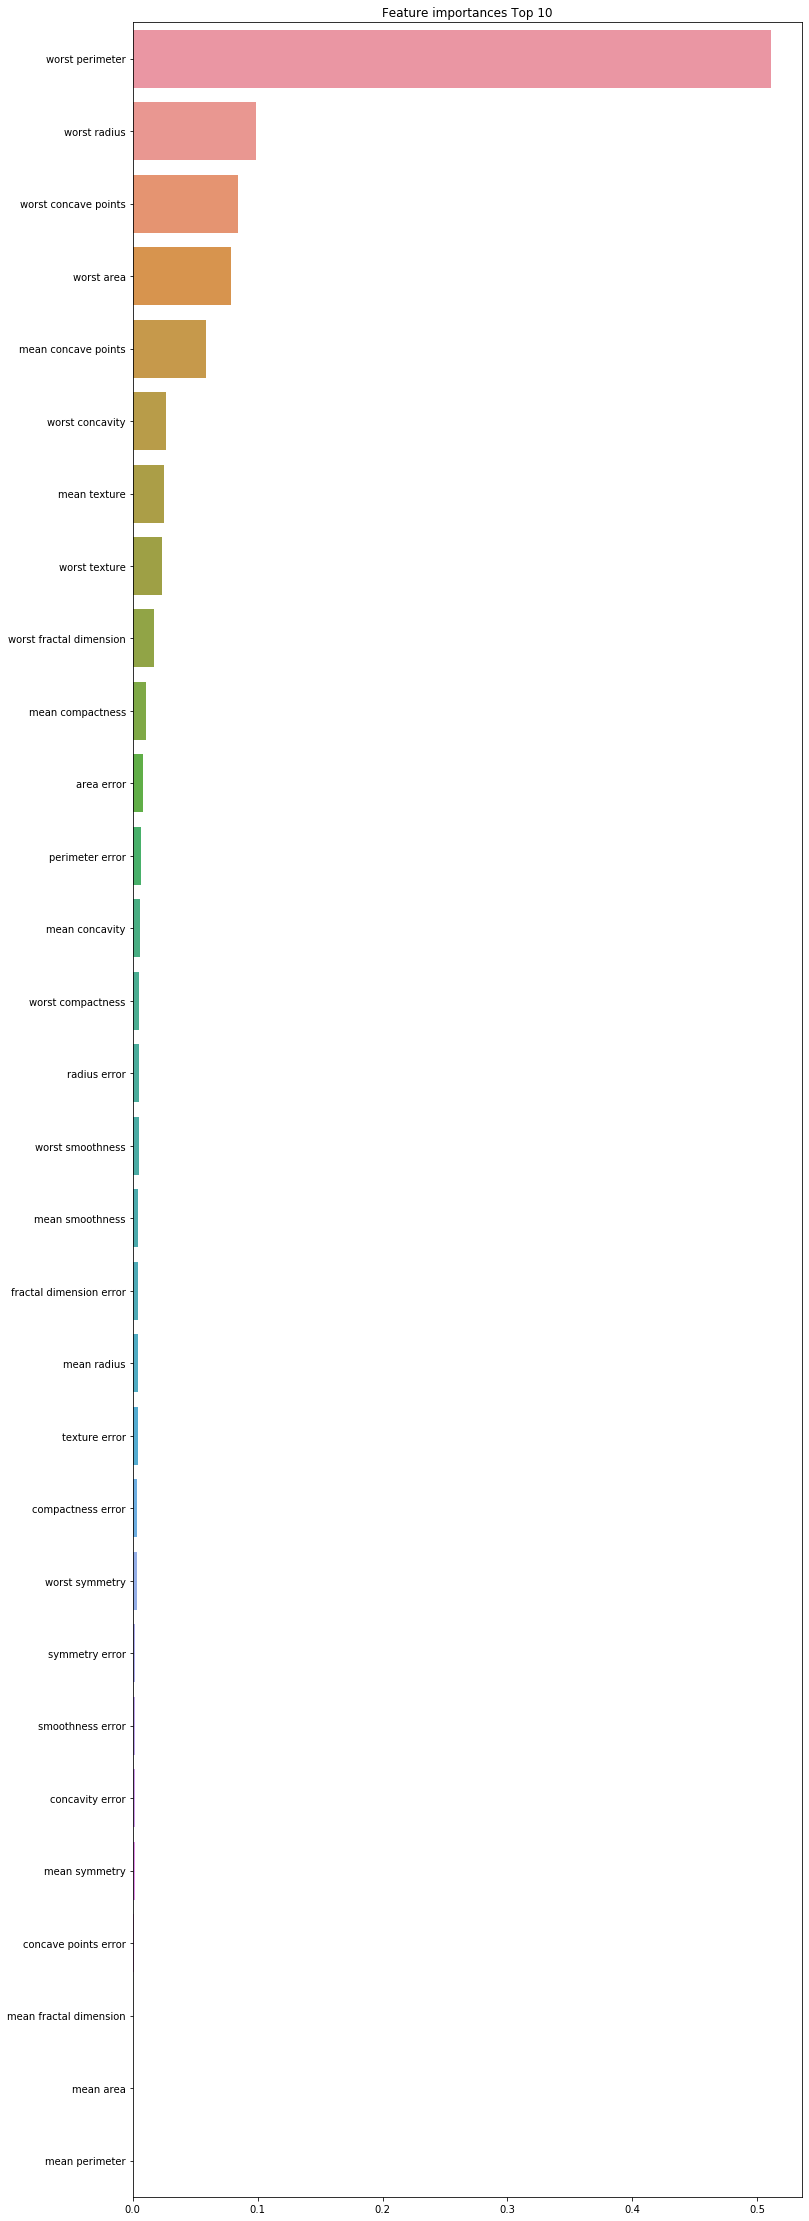

In [14]:
plt.figure(figsize=(12,40))
plt.title("Feature importances Top 10")
sns.barplot(x = importances, y = importances.index)
plt.show()

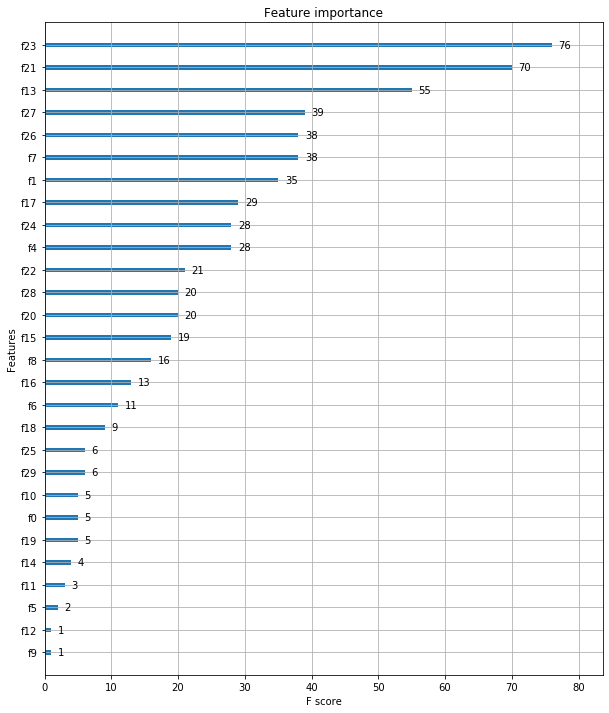

In [15]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)